In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import datashader as ds, colorcet as cc
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df: DataFrame = pd.read_csv('../../data/interim/2_further_exploration.csv')
df.head()

,lon0,lat0,lon1,lat1,passenger_count,year,month,day,hour,weekday,weekend,distance,fare
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,15,3,False,1.681111,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,16,4,False,2.454363,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,17,0,False,5.039603,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,4,False,1.661442,5.3
4,-73.932913,40.744085,-73.973082,40.761247,5,2014,8,28,13,3,False,4.483730,16.0


In [3]:
df['price_per_km'] = df['fare'] / df['distance']

<AxesSubplot:xlabel='year', ylabel='count'>

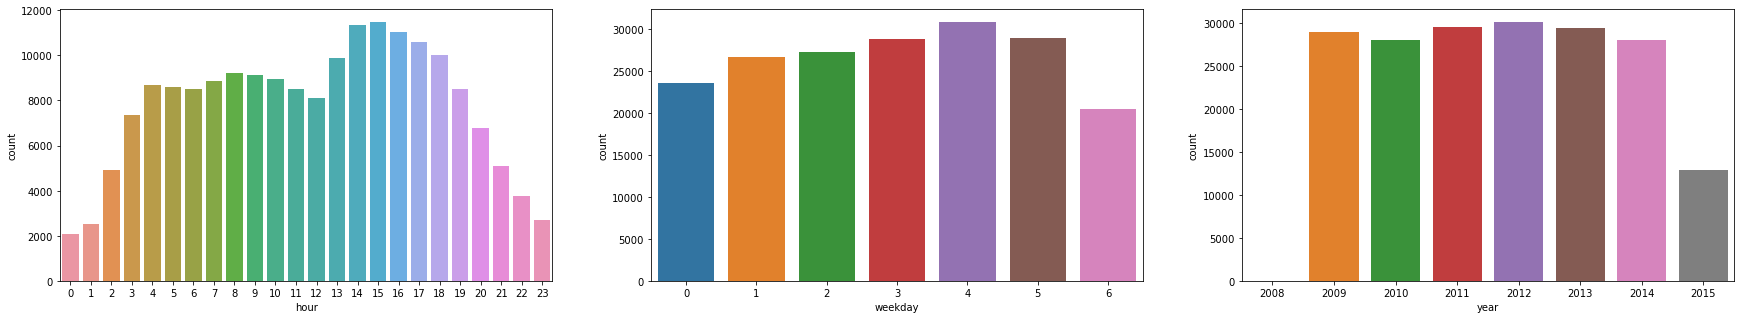

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(30,5))

sns.countplot(x='hour', data=df, ax=ax[0])
sns.countplot(x='weekday', data=df, ax=ax[1])
sns.countplot(x='year', data=df, ax=ax[2])

<AxesSubplot:xlabel='year', ylabel='price_per_km'>

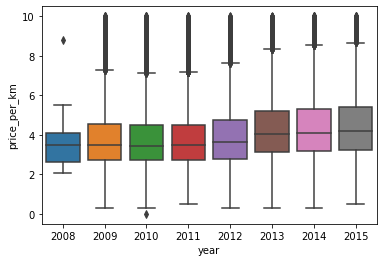

In [5]:
sns.boxplot(x='year', y='price_per_km', data=df)

<AxesSubplot:xlabel='distance', ylabel='price_per_km'>

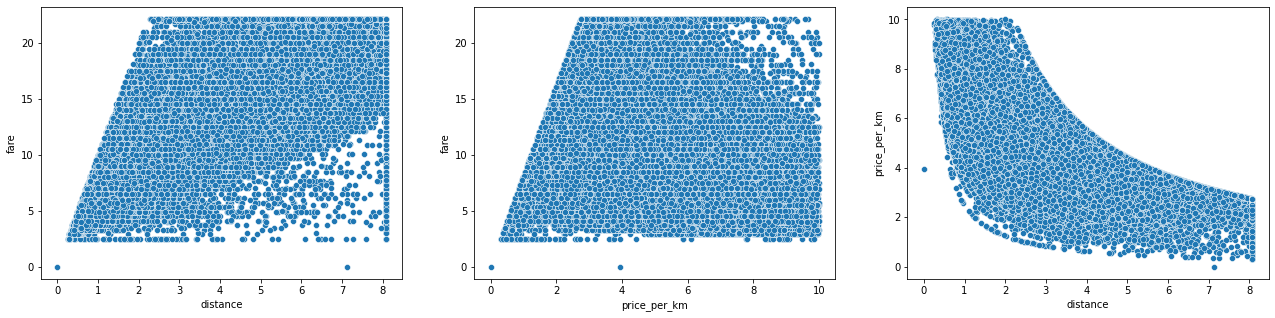

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))

sns.scatterplot(x='distance', y='fare', data=df, ax=ax[0])
sns.scatterplot(x='price_per_km', y='fare', data=df, ax=ax[1])
sns.scatterplot(x='distance', y='price_per_km', data=df, ax=ax[2])

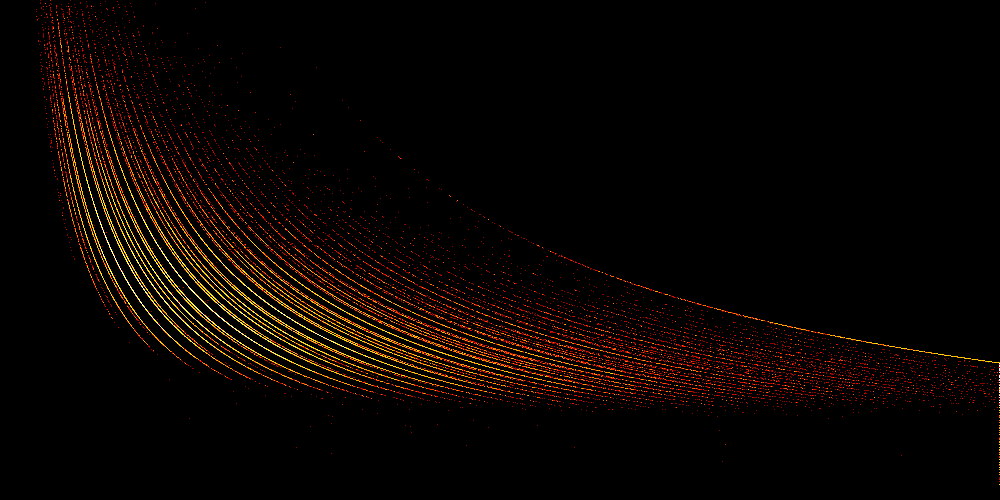

In [7]:
cvs = ds.Canvas(plot_width=1000, plot_height=500)
agg = cvs.points(df, 'distance', 'price_per_km')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

<AxesSubplot:xlabel='hour', ylabel='price_per_km'>

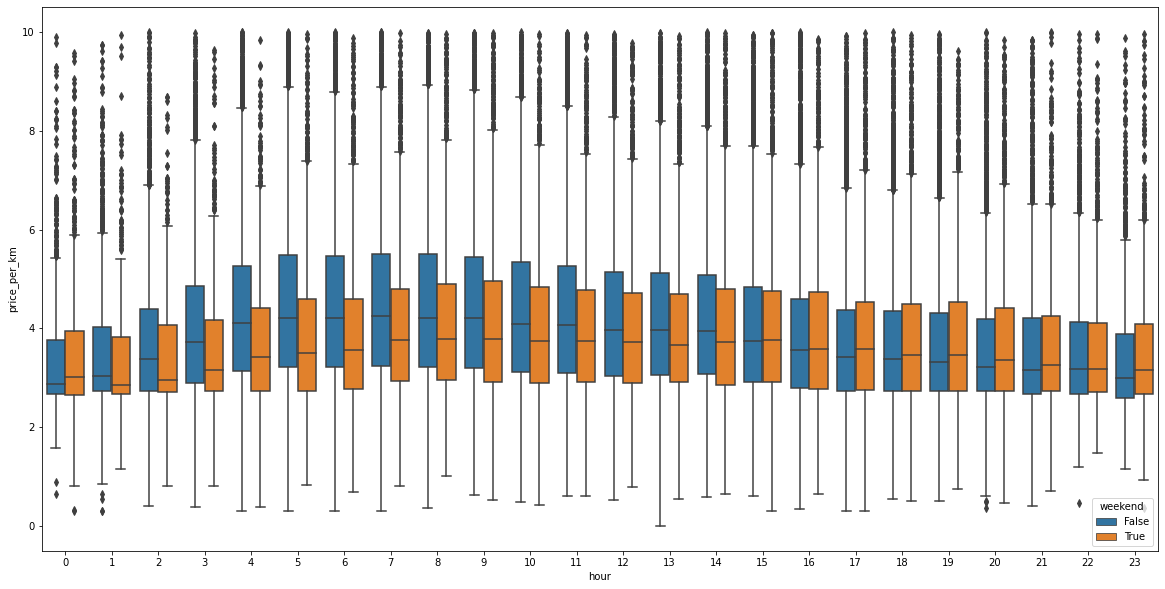

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x="hour", y='price_per_km', hue='weekend', data=df)

<AxesSubplot:xlabel='hour', ylabel='distance'>

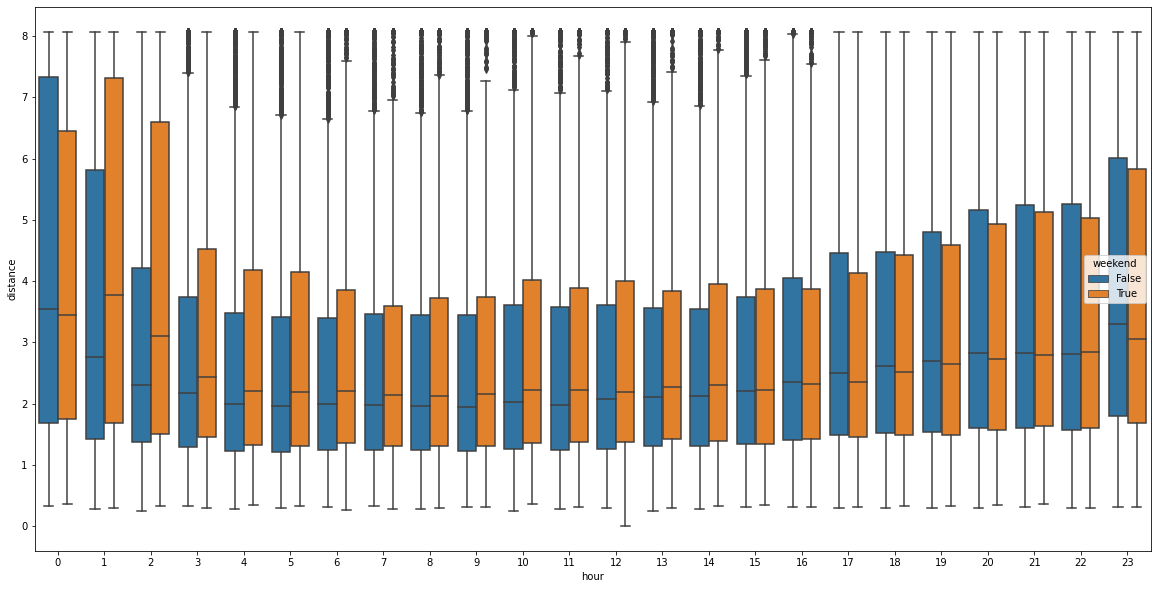

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x="hour", y='distance', hue='weekend', data=df)

<AxesSubplot:xlabel='passenger_count', ylabel='fare'>

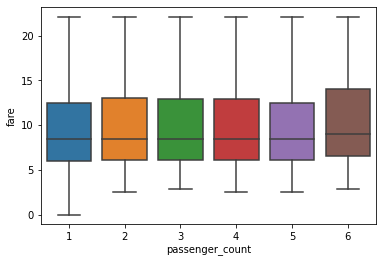

In [18]:
sns.boxplot(x='passenger_count', y='fare', data=df)

<AxesSubplot:>

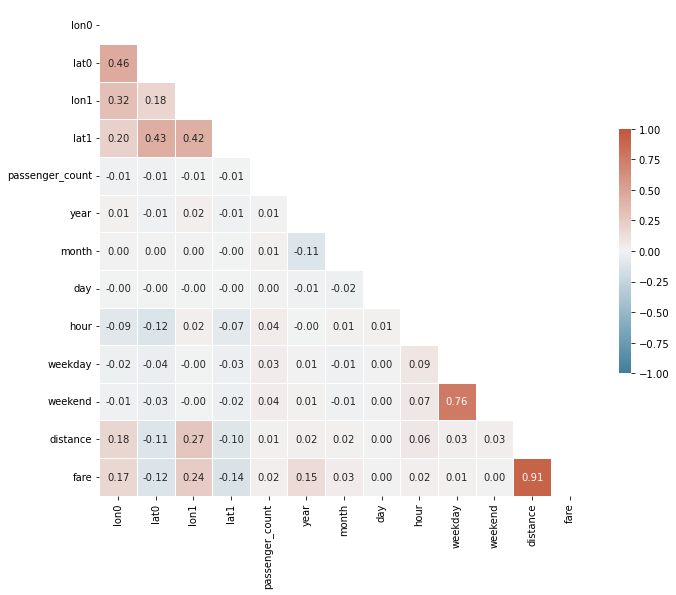

In [11]:
corr = df.loc[:, df.columns!='price_per_km'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

<AxesSubplot:xlabel='distance', ylabel='fare'>

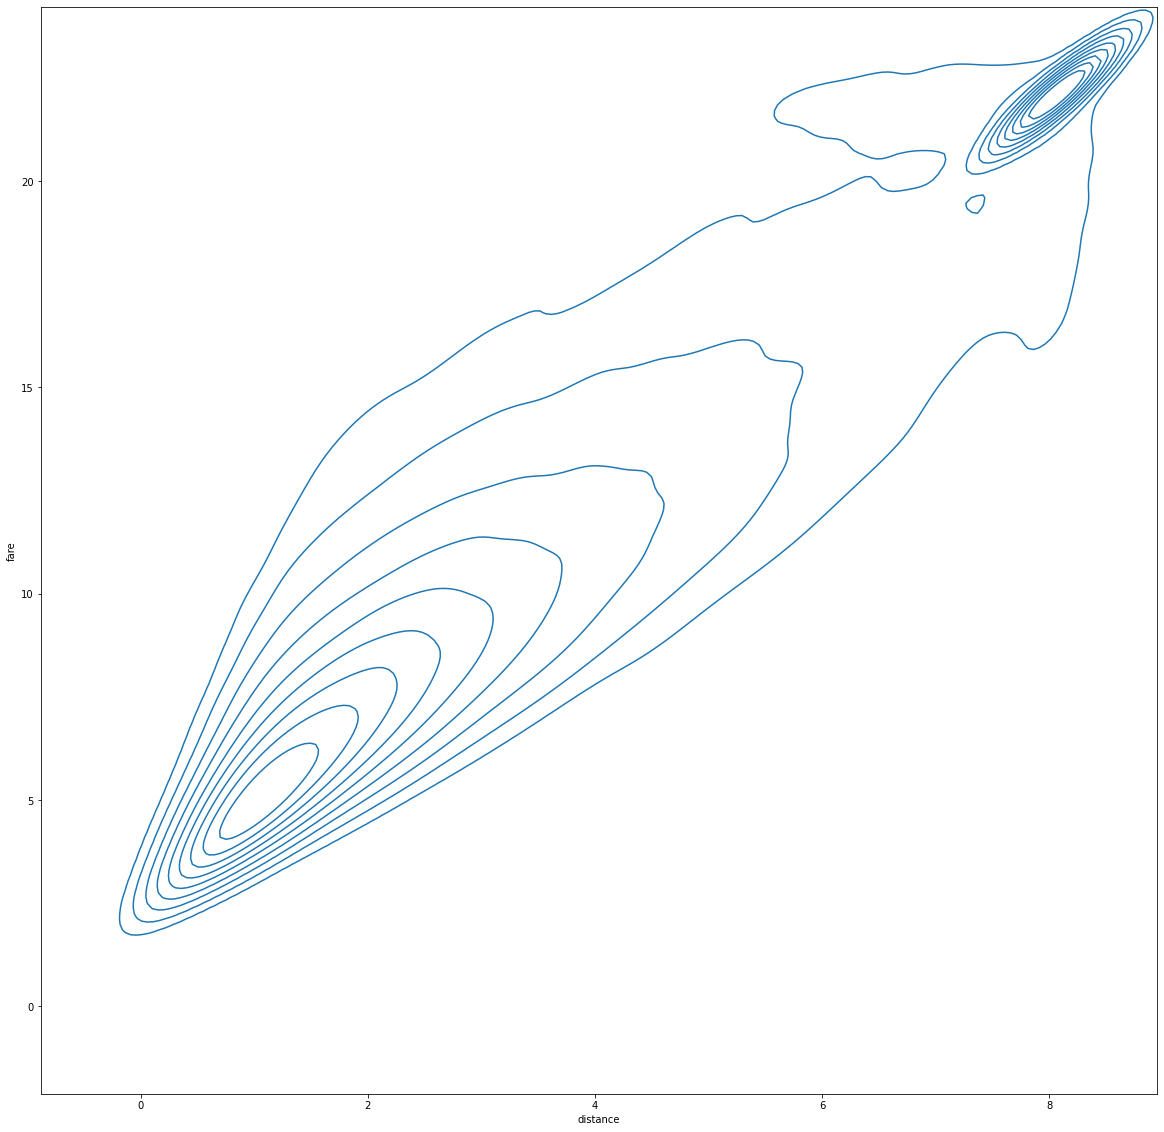

In [13]:
plt.figure(figsize=(20,20))
sns.kdeplot(data=df, x="distance", y="fare")